In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

### Escalamiento en función de máximos y mínimos

En esta transformación se garantiza que todas las variables (columnas) tengan las misma escala $[0,1]$ ó $[min,max]$

In [2]:
datos = {'a':[1,2,3,4,5,6,7,8,9,10]}
df1 = pd.DataFrame(datos)
df1

,a
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [3]:
datos_min_max = MinMaxScaler()
datos_min_max.fit_transform(df1[['a']])

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [4]:
#Realizando la transformada inversa del dato
datos_min_max.inverse_transform([[0.44444444]])

array([[4.99999996]])

In [5]:
df1['b'] = np.arange(10,20)
df1


,a,b
0,1,10
1,2,11
2,3,12
3,4,13
4,5,14
5,6,15
6,7,16
7,8,17
8,9,18
9,10,19


In [6]:
datos_min_max.fit_transform(df1)

array([[0.        , 0.        ],
       [0.11111111, 0.11111111],
       [0.22222222, 0.22222222],
       [0.33333333, 0.33333333],
       [0.44444444, 0.44444444],
       [0.55555556, 0.55555556],
       [0.66666667, 0.66666667],
       [0.77777778, 0.77777778],
       [0.88888889, 0.88888889],
       [1.        , 1.        ]])

In [7]:
#Realizando la tranformada inversa de los datos
datos_min_max.inverse_transform([[0.44444444,0.44444444]])

array([[ 4.99999996, 13.99999996]])

### Normalización de los datos

Se utiliza la norma (magnitud) de cada columna (vector) para normalizar los datos $$norma (columna_x) = \sqrt{dato_0^2 + dato_1^2 + dato_2^2+...+dato_n^2}$$

In [8]:
normalizador = Normalizer()
'''Normalizer trabaja con los renglones y no con las columnas, por esta razón se
aplica la transpuesta de los datos'''
valores_normalizados = normalizador.fit_transform(df1.values.T)
print(valores_normalizados)

[[0.05096472 0.10192944 0.15289416 0.20385888 0.2548236  0.30578831
  0.35675303 0.40771775 0.45868247 0.50964719]
 [0.21393127 0.2353244  0.25671753 0.27811066 0.29950378 0.32089691
  0.34229004 0.36368317 0.38507629 0.40646942]]


In [9]:
'''Realizando el cálculo de forma manual:
1) Se cálcula la norma de la primera columna
2) Se divide el primer dato de la primera columna del dataframe df1 '''
norma = np.linalg.norm(df1['a'].values)
print('Cálculo manual: {0}'.format(df1.iloc[0,0] / norma))
print('Cálculo con la transformación: {0}'.format(valores_normalizados[0,0]))


Cálculo manual: 0.050964719143762556
Cálculo con la transformación: 0.050964719143762556


### Estandarización de los datos ($desviación estandar = 1$ y $media = 0$)

Estandarizar consiste en cambiar la distribución de los datos para que tengan una media de cero y una desviación estandar de 1 $$z = \frac{dato_x-media}{std}$$

In [10]:
estanrizacion_1 = StandardScaler()
estanrizacion_1.fit_transform(df1)

array([[-1.5666989 , -1.5666989 ],
       [-1.21854359, -1.21854359],
       [-0.87038828, -0.87038828],
       [-0.52223297, -0.52223297],
       [-0.17407766, -0.17407766],
       [ 0.17407766,  0.17407766],
       [ 0.52223297,  0.52223297],
       [ 0.87038828,  0.87038828],
       [ 1.21854359,  1.21854359],
       [ 1.5666989 ,  1.5666989 ]])

In [11]:
#Transformación inversa
estanrizacion_1.inverse_transform([[-0.17407766, -0.17407766]])

array([[ 4.99999999, 13.99999999]])

### Estandarización robusta 

Esta estandarización en lugar de utilizar la media, utiliza el rango intercuartílico $$z = \frac{dato_x-IQR}{std}$$
* Esta estandarización no es tan afectada por los datos atípicos
* Es una de las más utilizadas

In [12]:
estanrizacion_2 = RobustScaler()
estanrizacion_2.fit_transform(df1)

array([[-1.        , -1.        ],
       [-0.77777778, -0.77777778],
       [-0.55555556, -0.55555556],
       [-0.33333333, -0.33333333],
       [-0.11111111, -0.11111111],
       [ 0.11111111,  0.11111111],
       [ 0.33333333,  0.33333333],
       [ 0.55555556,  0.55555556],
       [ 0.77777778,  0.77777778],
       [ 1.        ,  1.        ]])

In [13]:
#Transformación inversa
estanrizacion_2.inverse_transform([[-0.77777778, -0.77777778]])

array([[ 1.99999999, 10.99999999]])

# Jugando con las gráficas

In [14]:
from matplotlib import pyplot as plt

In [15]:
#Generando números aleatorios
x = np.random.rand(200)*100
y = np.random.rand(200)*100

In [16]:
#Escalamiento máximos-mínimos
max_min_x = MinMaxScaler()
max_min_y = MinMaxScaler()

#Normalización de los datos
norma_x = Normalizer()
norma_y = Normalizer()

#Estandarización normal
estand_x = StandardScaler()
estand_y = StandardScaler()

#Estandarización robusta
estand_robus_x = RobustScaler()
estand_robus_y = RobustScaler()

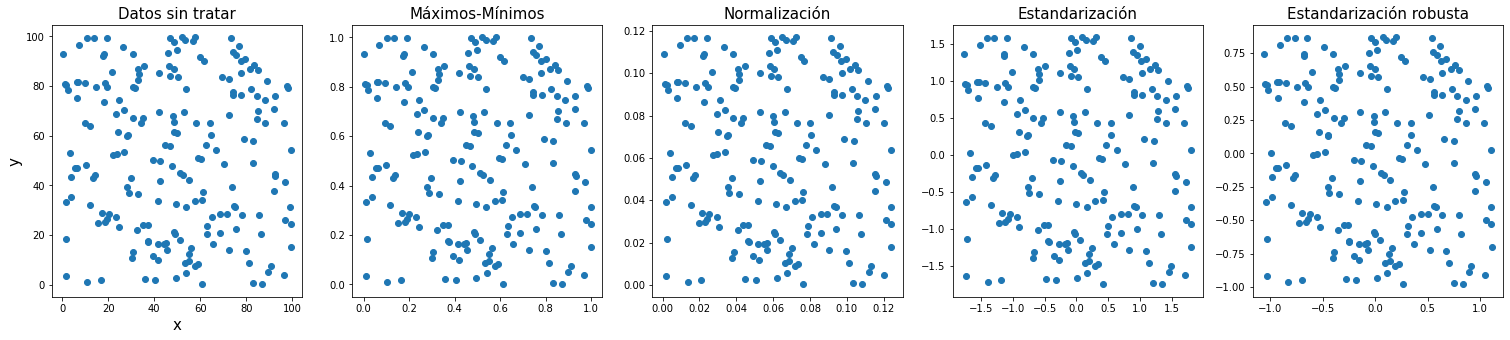

In [17]:
#Verificando gráficamente el efecto de las diferentes transformaciones de los datos
fig, axs = plt.subplots(1,5, figsize=(26,5))
axs[0].scatter(x,y)
axs[0].set_title('Datos sin tratar', fontsize=15)
axs[0].set_xlabel('x', fontsize=15)
axs[0].set_ylabel('y', fontsize=15)
axs[1].scatter(max_min_x.fit_transform(x.reshape(-1,1)), max_min_y.fit_transform(y.reshape(-1,1)))
axs[1].set_title('Máximos-Mínimos', fontsize=15)
axs[2].scatter(norma_x.fit_transform(x.reshape(-1,1).T), norma_y.fit_transform(y.reshape(-1,1).T))
axs[2].set_title('Normalización', fontsize=15)
axs[3].scatter(estand_x.fit_transform(x.reshape(-1,1)), estand_y.fit_transform(y.reshape(-1,1)))
axs[3].set_title('Estandarización', fontsize=15)
axs[4].scatter(estand_robus_x.fit_transform(x.reshape(-1,1)), estand_robus_y.fit_transform(y.reshape(-1,1)))
axs[4].set_title('Estandarización robusta', fontsize=15)
plt.show()


Se ha **modificado** la escala de los datos, pero **sin afectar** la información que contienen.